In [15]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image
import matplotlib.pyplot as plt
import os
from shutil import copyfile

In [16]:
import analysis as an

In [19]:
cur = an.get_cursor('./output/fill_source.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [20]:
rebus_ids = an.get_prototype_id(cur, 'rebus')
num = cur.execute('select count() from agententry where prototype = "rebus"').fetchone()[0]
print(num)

95


In [21]:
# did it get init fuel?
z = 0 
for id in rebus_ids:
    count = cur.execute('select count() from transactions where commodity = "init_fuel" and receiverid = "' + id + '"').fetchone()[0]
    if count == 0:
        z += 1
        print(id, count)
print(z)

0


In [26]:
z=0
for id in rebus_ids:
    count = cur.execute('select count() from transactions where commodity = "dep_u" and receiverid = "' + id + '"').fetchone()[0]
    entertime = cur.execute('select entertime from agententry where agentid = "%s"' %id).fetchone()[0]
    lifetime = min(duration-entertime-1, 478)
    if count != lifetime:
        z += 1
        print(id, count)
print(z)

0


# one reactor

In [28]:
import h5py

/home/teddy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0.09034363991813091

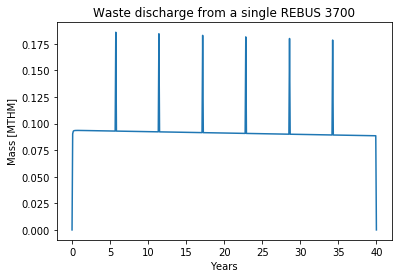

In [42]:
cur = an.get_cursor('./output/one_reactor.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)
rebus_id = an.get_prototype_id(cur, 'rebus_3700')
waste_out = an.facility_commodity_flux(cur, rebus_id, ['waste'], True, False)
plt.plot(timestep/12, waste_out['waste'])
plt.title('Waste discharge from a single REBUS 3700')
plt.xlabel('Years')
plt.ylabel('Mass [MTHM]')
plt.savefig('rebus_waste.png', format='png')
out = waste_out['waste']
out[out!=0].mean()